In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('pIC50_dataset.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,9.679854
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,6.562249
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,4.118045
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,4.259637


In [3]:
std_val = df['pIC50'].tolist()
std_val

[6.1249387366083,
 7.0,
 4.301029995663981,
 6.522878745280337,
 6.096910013008056,
 5.619788758288394,
 7.0,
 4.301029995663981,
 6.096910013008056,
 4.301029995663981,
 4.301029995663981,
 7.301029995663981,
 4.0,
 6.251811972993799,
 8.0,
 8.0,
 5.853871964321762,
 4.769551078621726,
 5.958607314841775,
 4.301029995663981,
 7.585026652029182,
 4.301029995663981,
 6.096910013008056,
 4.301029995663981,
 4.301029995663981,
 7.251811972993799,
 6.698970004336019,
 6.522878745280337,
 6.698970004336019,
 4.301029995663981,
 6.301029995663981,
 4.0,
 4.301029995663981,
 3.585026652029182,
 7.657577319177793,
 3.0,
 5.42021640338319,
 7.397940008672037,
 3.0,
 7.136677139879544,
 5.508638306165727,
 3.283996656365201,
 5.346787486224656,
 5.920818753952375,
 3.0,
 3.0,
 6.267606240177032,
 7.522878745280337,
 6.080921907623926,
 4.698970004336019,
 3.0,
 3.0,
 6.4089353929735005,
 6.4089353929735005,
 6.366531544420414,
 3.0,
 6.221848749616356,
 5.698970004336019,
 3.0,
 4.67778070526608

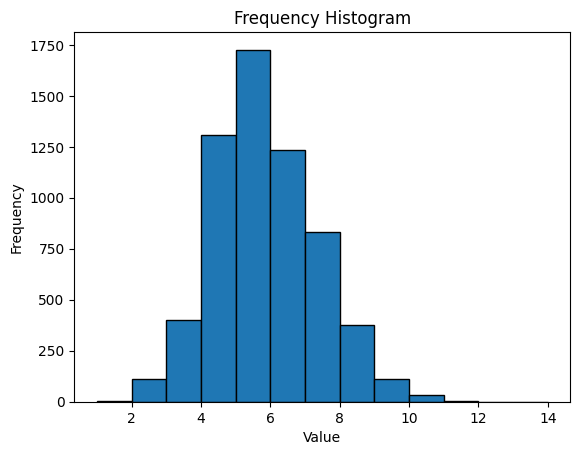

In [4]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(std_val, bins=range(int(min(std_val)), int(max(std_val)) + 1), edgecolor='black')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Histogram')

# Display the plot
plt.show()


In [5]:
df2 = pd.read_csv('30OctDataset.csv')
df2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000
...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000


In [6]:
bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [7]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df2 = pd.concat([df2, bioactivity_class], axis=1)
df2

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active
...,...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive


In [9]:
active_count = (df2['class'] == 'active').sum()
active_count

2607

In [10]:
inactive_count = (df2['class'] == 'inactive').sum()
inactive_count

2012

In [11]:
intermediate_cnt = (df2['class'] == 'intermediate').sum()
intermediate_cnt

1537